In [1]:
# TODO 
# seattle vs all other towns
# what latitude splits the values and what longitude splits the values 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
from datetime import datetime
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('kc_house_data.csv')
zips = pd.read_csv('zips_kc.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
zips.head()

,zip,towns
0,98001,"['Algona', 'Auburn', 'Federal Way']"
1,98002,['Auburn']
2,98003,"['Auburn', 'Federal Way']"
3,98004,"['Beaux Arts Village', 'Bellevue', 'Clyde Hill..."
4,98005,['Bellevue']


In [7]:
zips_dict = zips.set_index('zip').to_dict()

In [8]:
zips_dict = dict(zip(zips.zip, zips.towns))

In [9]:
zips_dict

{98001: "['Algona', 'Auburn', 'Federal Way']",
 98002: "['Auburn']",
 98003: "['Auburn', 'Federal Way']",
 98004: "['Beaux Arts Village', 'Bellevue', 'Clyde Hill', 'Hunts Point', 'Yarrow Point']",
 98005: "['Bellevue']",
 98006: "['Bellevue']",
 98007: "['Bellevue']",
 98008: "['Bellevue']",
 98009: "['Bellevue']",
 98010: "['Black Diamond']",
 98011: "['Bothell']",
 98013: "['Burton', 'Vashon']",
 98014: "['Carnation']",
 98015: "['Bellevue']",
 98019: "['Duvall']",
 98022: "['Enumclaw']",
 98023: "['Auburn', 'Federal Way']",
 98024: "['Fall City']",
 98025: "['Hobart']",
 98027: "['Issaquah']",
 98028: "['Kenmore', 'Bothell']",
 98029: "['Issaquah']",
 98030: "['Kent']",
 98031: "['Kent']",
 98032: "['Kent']",
 98033: "['Kirkland']",
 98034: "['Kirkland']",
 98035: "['Kent']",
 98038: "['Maple Valley']",
 98039: "['Medina']",
 98040: "['Mercer Island']",
 98041: "['Bothell']",
 98042: "['Covington', 'Kent']",
 98045: "['North Bend']",
 98047: "['Auburn', 'Pacific']",
 98050: "['Prest

In [10]:
zips_dict.keys()

dict_keys([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98009, 98010, 98011, 98013, 98014, 98015, 98019, 98022, 98023, 98024, 98025, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98035, 98038, 98039, 98040, 98041, 98042, 98045, 98047, 98050, 98051, 98052, 98053, 98054, 98055, 98056, 98057, 98058, 98059, 98062, 98063, 98064, 98065, 98068, 98070, 98071, 98072, 98073, 98074, 98075, 98083, 98092, 98093, 98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 98171, 98174, 98177, 98178, 98188, 98198, 98199, 98224, 98288])

In [11]:
#drop yr_renovated too many outliers 
df = df.drop('yr_renovated',axis=1)

print(df.view.value_counts())
print(df.waterfront.value_counts())

# fill the view and waterfront with 0 
df = df.fillna(value={'view':0,
                      'waterfront':0})

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [12]:
df = df[df.bedrooms < 7]
df = df[df.bathrooms < 5]

In [26]:
df['towns'] = df.zipcode.apply(lambda x: zips_dict[x] if x in zips_dict.keys() else 'Woodinville')

In [27]:
df[['zipcode','towns']]

,zipcode,towns
0,98178,"['Seattle', 'Tukwila']"
1,98125,['Seattle']
2,98028,"['Kenmore', 'Bothell']"
3,98136,['Seattle']
4,98074,"['Sammamish', 'Redmond']"
...,...,...
21592,98103,['Seattle']
21593,98146,"['Burien', 'Seattle']"
21594,98144,['Seattle']
21595,98027,['Issaquah']


In [28]:
df.towns.value_counts()

['Seattle']                                                                        6012
['Bellevue']                                                                       1075
['Redmond']                                                                         975
['Kirkland']                                                                        972
['Newcastle', 'Renton']                                                             870
['Auburn', 'Federal Way']                                                           778
['Seattle', 'Shoreline']                                                            744
['Issaquah']                                                                        730
['Renton']                                                                          720
['Kent']                                                                            653
['Maple Valley']                                                                    588
['Auburn']                      

In [29]:
print(len(df[df.towns.apply(lambda x: True if 'Seattle' in x else False)]))
print(len(df[df.towns.apply(lambda x: False if 'Seattle' in x else True)]))
# print(len(df[df.towns.apply(lambda x: True if 'Bellevue' in x else False)]))
# print(len(df[df.towns.apply(lambda x: False if 'Bellevue' in x else True)]))

8930
12549


In [30]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,towns,seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,"['Seattle', 'Tukwila']",True
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,['Seattle'],True
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,98028,47.7379,-122.233,2720,8062,"['Kenmore', 'Bothell']",False
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,['Seattle'],True
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,"['Sammamish', 'Redmond']",False
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930,['Redmond'],False
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,98003,47.3097,-122.327,2238,6819,"['Auburn', 'Federal Way']",False
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,1060,0.0,1963,98198,47.4095,-122.315,1650,9711,"['Des Moines', 'Normandy Park', 'Seatac', 'Sea...",True
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,98146,47.5123,-122.337,1780,8113,"['Burien', 'Seattle']",True
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,1890,0.0,2003,98038,47.3684,-122.031,2390,7570,['Maple Valley'],False


In [31]:
df['seattle'] = df.towns.apply(lambda x: True if 'Seattle' in x else False)

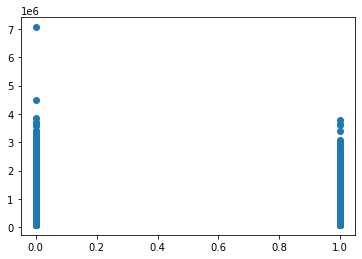

In [32]:
plt.scatter(df.seattle, df.price)

<Figure size 432x288 with 0 Axes>

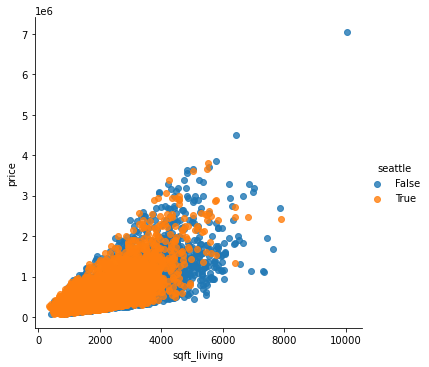

In [33]:
plt.clf()
sns.lmplot(x='sqft_living', y='price', hue='seattle', data=df, fit_reg=False, height=5)
plt.show()

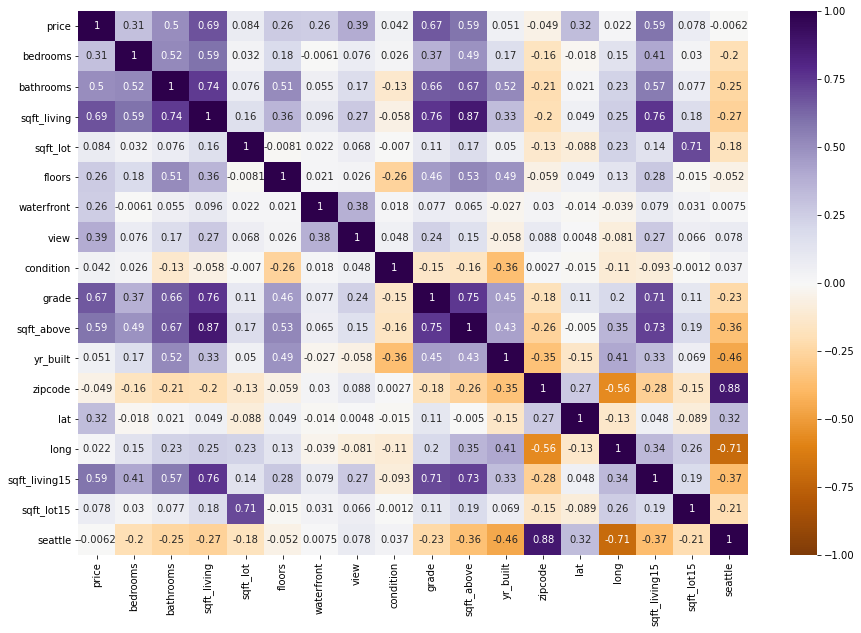

In [35]:
corr_grid = df.iloc[:,1:].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()
